# Stream Clustering

In [1]:
from scripts.preprocess_data import *
from scripts.preprocess_lemmatizer import preprocess_lemmatizer
from river import cluster
from river import stream
from river import feature_extraction
from river import compose
import nltk
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
#nltk.download('wordnet')


In [2]:
df = load_data()
df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')
df['minute_of_day'] = df['datetime'].dt.hour * 60 + df['datetime'].dt.minute
length = 1000
df_sub = df.iloc[:length]


In [3]:
preprocessed_text_sub = [ preprocess_lemmatizer(tweet)for tweet in df_sub['text']]


In [4]:
text_clust_algo = cluster.TextClust(real_time_fading=False, fading_factor=0.001, tgap=100, auto_r=False,
    radius=0.9, num_macro = 10)

stopwords = [ 'stop', 'the', 'to', 'and', 'a', 'in', 'it', 'is', 'I']

In [5]:
model = compose.Pipeline(
    feature_extraction.BagOfWords(lowercase=True, ngram_range=(1, 2), stop_words=stopwords),
    text_clust_algo,
)

In [6]:
i=0
old_time = df_sub.loc[i, 'minute_of_day']

for text in preprocessed_text_sub:
    i += 1
    model.learn_one(text)
    if df_sub.loc[i, 'minute_of_day'] != old_time:
        old_time = df_sub.loc[i, 'minute_of_day']
        micro_clusters = text_clust_algo.micro_clusters
        keys = [int(key) for key in micro_clusters.keys()]

        for key in keys:
            micro_cluster = micro_clusters[key]
            weight = micro_cluster.weight
            print()  
        print()
    i += 1
        #TODO: LOG micro_cluster_id, micro_cluster_weight, minute_of_day
#         old_time = df_sub['datetime'].dt.minute
#         log_micro_clusters.
        
    # i+=1
#text_clust_algo.showclusters(topn=10,num=5)
#text_clust_algo.updateMacroClusters()
#macroclust = text_clust_algo.get_macroclusters()
#distance_matrix = text_clust_algo._get_distance_matrix(text_clust_algo.micro_clusters)



7.849330387886537
8.843081902206052
4.933931631929635
2.9458446148750044
1.994462502704139
3.930628320700835
1
1
2.9375827161367423
1
1
1
1
1
1
1.998614185980905
1.9916995061889162
1
1

11.588382805637979
10.57940077221685
5.684322092751076
4.8510825317207695
3.8641971662473065
3.930628320700835
1
1
2.9375827161367423
1.945309894824571
1.9105658727648747
4.8879077580231
1
4.898872429955531
1
1.998614185980905
2.9179704526109087
4.887968911855497
1
1
1
1.9738330917716838
1
1
1.977941832761863
1
1
1
1
1
1
1.9958454379981012
1
1
1

17.275968533012843
13.259094838071567
5.641146111969415
4.757839893727357
3.7872973834046983
3.765287298142865
0.9388717473154521
1.9274198423202162
3.794051818320375
1.8921152934511918
1.900000765749772
4.820614487509194
0.9519779084975315
6.776359507017086
0.9546210141397169
1.9105658727648747
2.8758038447793566
5.859469504407412
0.9639298077406432
0.965267024871757
1.931872657849691
1.9332121941299463
0.9686181892266277
0.9706344697695466
2.9308427703502766


KeyError: 1001

In [47]:
complete_linkage_stream_clust = linkage(distance_matrix,method='ward')

C:\Users\Simon.Luttmann\AppData\Local\Temp\ipykernel_18152\3172585452.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  complete_linkage_stream_clust = linkage(distance_matrix,method='ward')


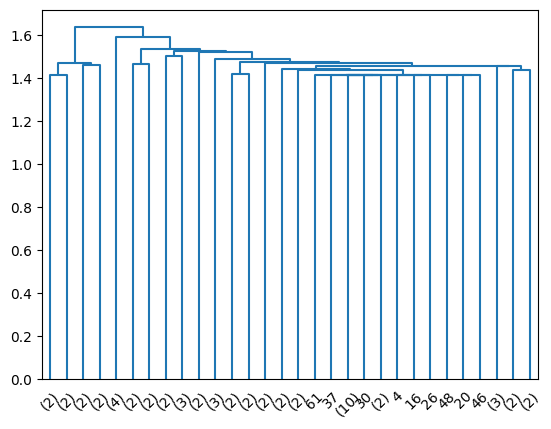

In [49]:
dendrogram(complete_linkage_stream_clust, truncate_mode='lastp', p=30)
plt.show()

In [54]:
threshold = 1.5
#6.3  # Replace with the value identified from the dendrogram
clusters = fcluster(complete_linkage_stream_clust, t=threshold, criterion='distance')
clusters[:]

array([1, 1, 2, 7, 7, 3, 6, 7, 7, 3, 7, 4, 4, 5, 1, 5, 7, 7, 3, 6, 7, 1,
       2, 1, 7, 3, 7, 7, 7, 5, 7, 7, 7, 2, 1, 1, 2, 7, 1, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
      dtype=int32)

In [16]:
text_clust_algo._agglomerative_clustering()

-------------------------------------------
Summary of micro clusters:
----
micro cluster id 0
micro cluster weight 490.25358925561653
weight: 88.32	 token: health
weight: 73.25	 token: politics
weight: 68.8	 token: business
-------------------------------------------


In [ ]:
text_clust_algo.learn_one(preprocessed_text_list_of_dicts[0])
text_clust_algo.micro_clusters

TypeError: can't multiply sequence by non-int of type 'float'